In [3]:
import sqlite3

def get_table_names(file_path):
    
    # Create a SQL connection to our SQLite database
    con = sqlite3.connect(file_path)

    # creating cursor
    cur = con.cursor()

    # reading all table names
    table_list = [a for a in cur.execute("SELECT name FROM sqlite_master WHERE type = 'table' OR type = 'view'")]

    # Be sure to close the connection
    con.close()

    table_names = [name[0] for name in table_list]

    return table_names


def print_data(file_path, table_name = None):
    
    if table_name is None:
        table_names = get_table_names(file_path)

        # Create a SQL connection to our SQLite database
        con = sqlite3.connect(file_path)

        cur = con.cursor()

        # The result of a "cursor.execute" can be iterated over by row
        for name in table_names:
            if name == 'ElementaryGeometries' or name == 'SpatialIndex':
                continue
            sql_command = "SELECT * FROM " + name
            print(name)
            for row in cur.execute(sql_command):
                print(row)
            print('\n\n')

        # Be sure to close the connection
        con.close()
    
    else:
        # Create a SQL connection to our SQLite database
        con = sqlite3.connect(file_path)

        cur = con.cursor()

        # The result of a "cursor.execute" can be iterated over by row
        sql_command = "SELECT * FROM " + table_name
        print(table_name)
        for row in cur.execute(sql_command):
            print(row)

        # Be sure to close the connection
        con.close()

In [23]:
a = get_table_names(r"\Users\Administrator\Downloads\DP08_XX_K01_C07_F2_N001.db")
len(a)
print(a)

['__EFMigrationsHistory', 'spatial_ref_sys', 'spatialite_history', 'sqlite_sequence', 'geometry_columns', 'geom_cols_ref_sys', 'spatial_ref_sys_aux', 'spatial_ref_sys_all', 'views_geometry_columns', 'virts_geometry_columns', 'geometry_columns_statistics', 'views_geometry_columns_statistics', 'virts_geometry_columns_statistics', 'geometry_columns_field_infos', 'views_geometry_columns_field_infos', 'virts_geometry_columns_field_infos', 'geometry_columns_time', 'geometry_columns_auth', 'views_geometry_columns_auth', 'virts_geometry_columns_auth', 'vector_layers', 'vector_layers_auth', 'vector_layers_statistics', 'vector_layers_field_infos', 'sql_statements_log', 'SpatialIndex', 'ElementaryGeometries', 'Project', 'Document', 'DocumentParameter', 'Element', 'Workset', 'ElementParameterInteger', 'ElementParameterNumber', 'ElementParameterRevitId', 'ElementParameterText', 'LevelTypeElements', 'LevelElements', 'ModelLineElements', 'RoomElements']


In [1]:
import sqlite3

def initialize(file_path):
    
    # Create a SQL connection to our SQLite database
    # returns connection and cursor

    con = sqlite3.connect(file_path)
    cur = con.cursor()
    print('Opening connection')

    return cur, con


def finilize(con):

    # Closes SQL connection

    con.close()
    print('Closing connection')

In [6]:
def work(file_path, sql):
    
    cur, con = initialize(file_path)
    out = cur.execute(sql)
    print('SQL done')
    
    table_list = [a[0] for a in out] #why do I get ordered output sometimes???
    print('Work completed')

    finilize(con)

    return table_list

In [10]:
sql = "SELECT DISTINCT Area FROM RoomElements LIMIT 10"
table_list = work(r"\Users\Administrator\Downloads\DP08_XX_K01_C07_F2_N001.db", sql)

print(table_list)

Opening connection
SQL done
Work completed
Closing connection
[411.04770086900044, 1478.7482757795442, 1071.8324017396244, 3686.413271557628, 222.6724220989704, 575.1817269431986, 355.6055593861197, 554.7101625277137, 527.8862984124022, 420.27662310201276]


In [37]:
import sqlite3

def generate_docs(db, docs, title):
    # open doc file and define table template
    f = open(docs, "w+")
    f.write(title + "\n")
    table_template = "|{}|{}|\n| :-: | :-:|\n".format("COLUMN", "DESCRIPTION")
    # open database
    con = sqlite3.connect(db)
    cur = con.cursor()
    cur.execute("SELECT name FROM sqlite_master WHERE type='view';")
    for table in cur.fetchall():
        # print table name
        table_name = table[0].upper()
        f.write("### {}\n".format(table_name))
        f.write(table_template)
        if table_name == 'ELEMENTARYGEOMETRIES' or table_name == 'SPATIALINDEX':
            continue
        # print table columns
        cur.execute("SELECT * FROM {};".format(table_name))
        cols = [description[0] for description in cur.description]
        for col in cols:
            f.write("| {} | |\n".format(col))
    f.close()


generate_docs(r"\Users\Administrator\Downloads\DP08_XX_K01_C07_F2_N001.db", "db_template_views.md",
              "Room schema")

In [16]:
# issue with SpatialIndex and ElementaryGeometries
print_data(r"\Users\Administrator\Downloads\DP08_XX_K01_C07_F2_N001.db", 'SpatialIndex')

SpatialIndex


OperationalError: no such module: VirtualSpatialIndex

In [8]:
import pymysql
  
def mysqlconnect():
    # To connect MySQL database
    conn = pymysql.connect(
        host='192.168.2.140',
        user='admin', 
        password = "admin",
        db='db',
        port=6606
        )
      
    cur = conn.cursor()
    cur.execute("select @@version")
    output = cur.fetchall()
    print(output)
      
    # To close the connection
    conn.close()

In [9]:
mysqlconnect()

(('5.7.37',),)


In [2]:
#import os
import pymysql
import pandas as pd

""" host = os.getenv('MYSQL_HOST')
port = os.getenv('MYSQL_PORT')
user = os.getenv('MYSQL_USER')
password = os.getenv('MYSQL_PASSWORD')
database = os.getenv('MYSQL_DATABASE')
 """

conn = pymysql.connect(
    host='192.168.2.140',
    user='admin', 
    password = "admin",
    db='db',
    port=6606
    )

#df = pd.read_sql_query("SELECT * FROM folders", conn)

In [18]:
pd.read_sql_query("SELECT table_name FROM information_schema.tables", conn)

,table_name
0,CHARACTER_SETS
1,COLLATIONS
2,COLLATION_CHARACTER_SET_APPLICABILITY
3,COLUMNS
4,COLUMN_PRIVILEGES
...,...
64,items
65,objects
66,projects
67,properties


In [27]:
a = pd.read_sql_query("SELECT name FROM versions", conn)
b = pd.read_sql_query("SELECT display_name FROM items", conn)

In [28]:
a['name'] == b['display_name']

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
dtype: bool

## GAN

In [34]:
import torch
from torch import nn

import math
import matplotlib.pyplot as plt

In [35]:
torch.manual_seed(111)

In [36]:
train_data_length = 1024
train_data = torch.zeros((train_data_length, 2))
train_data[:, 0] = 2 * math.pi * torch.rand(train_data_length)
train_data[:, 1] = torch.sin(train_data[:, 0])
train_labels = torch.zeros(train_data_length)
train_set = [
    (train_data[i], train_labels[i]) for i in range(train_data_length)
]

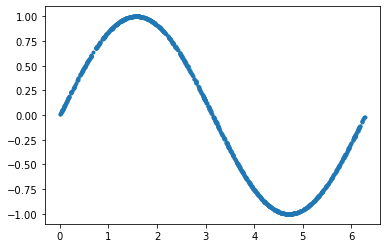

In [37]:
plt.plot(train_data[:, 0], train_data[:, 1], ".")

In [38]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

In [39]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        output = self.model(x)
        return output

discriminator = Discriminator()

In [40]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 2),
        )

    def forward(self, x):
        output = self.model(x)
        return output

generator = Generator()

In [41]:
lr = 0.001
num_epochs = 300
loss_function = nn.BCELoss()

In [42]:
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

In [46]:
for epoch in range(num_epochs):
    for n, (real_samples, _) in enumerate(train_loader):
        # Data for training the discriminator
        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.randn((batch_size, 2))
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )

        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Data for training the generator
        latent_space_samples = torch.randn((batch_size, 2))

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels
        )
        loss_generator.backward()
        optimizer_generator.step()

        # Show loss
        if epoch % 10 == 0 and n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")

Epoch: 0 Loss D.: 0.23930871486663818
Epoch: 0 Loss G.: 2.16796612739563
Epoch: 10 Loss D.: 0.5678741335868835
Epoch: 10 Loss G.: 1.0999937057495117
Epoch: 20 Loss D.: 0.5850481390953064
Epoch: 20 Loss G.: 0.8488578200340271
Epoch: 30 Loss D.: 0.5778447389602661
Epoch: 30 Loss G.: 0.9257263541221619
Epoch: 40 Loss D.: 0.6380331516265869
Epoch: 40 Loss G.: 0.8134908676147461
Epoch: 50 Loss D.: 0.657916784286499
Epoch: 50 Loss G.: 0.7496180534362793
Epoch: 60 Loss D.: 0.7192956209182739
Epoch: 60 Loss G.: 0.6736000776290894
Epoch: 70 Loss D.: 0.6860898733139038
Epoch: 70 Loss G.: 0.6843236088752747
Epoch: 80 Loss D.: 0.7130318880081177
Epoch: 80 Loss G.: 0.8404867649078369
Epoch: 90 Loss D.: 0.6945654153823853
Epoch: 90 Loss G.: 0.712794840335846
Epoch: 100 Loss D.: 0.6646022200584412
Epoch: 100 Loss G.: 0.6828826069831848
Epoch: 110 Loss D.: 0.6633837819099426
Epoch: 110 Loss G.: 0.7613082528114319
Epoch: 120 Loss D.: 0.6190356612205505
Epoch: 120 Loss G.: 0.8631078004837036
Epoch: 130 

In [47]:
latent_space_samples = torch.randn(100, 2)
generated_samples = generator(latent_space_samples)

In [51]:
generated_samples

tensor([[ 2.9149,  0.2327],
        [ 1.1209,  0.8810],
        [ 0.7605,  0.6857],
        [ 6.8801,  0.4491],
        [ 6.2444,  0.2127],
        [ 5.0206, -0.6557],
        [ 3.7163, -0.5201],
        [ 1.2710,  0.9508],
        [ 1.5273,  0.9650],
        [ 4.0946, -0.7674],
        [ 1.2368,  0.9335],
        [ 2.6161,  0.5261],
        [ 1.4120,  0.9620],
        [ 4.2894, -0.8367],
        [ 1.6938,  0.9675],
        [ 3.8743, -0.6557],
        [ 3.2346, -0.0365],
        [ 4.4828, -0.8136],
        [ 0.7022,  0.6378],
        [ 4.4180, -0.8389],
        [ 4.7530, -0.7860],
        [ 0.4300,  0.4340],
        [ 0.5596,  0.5368],
        [ 1.1728,  0.9043],
        [ 3.6115, -0.4340],
        [ 2.2469,  0.7864],
        [ 5.5690, -0.1976],
        [ 2.7765,  0.3681],
        [ 2.4626,  0.6405],
        [ 4.7971, -0.7903],
        [ 5.0802, -0.5841],
        [ 5.9085,  0.0816],
        [ 5.2134, -0.4730],
        [ 4.2476, -0.8233],
        [ 1.7588,  0.9536],
        [ 5.7286,  0

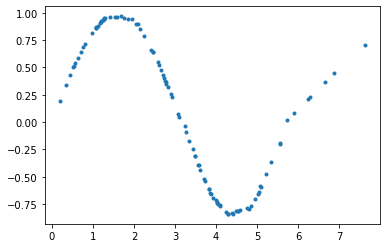

In [52]:
generated_samples = generated_samples.detach()
plt.plot(generated_samples[:, 0], generated_samples[:, 1], ".")

9913344it [00:00, 45414566.00it/s]                             


Extracting .\MNIST\raw\train-images-idx3-ubyte.gz to .\MNIST\raw



29696it [00:00, 29776249.48it/s]         

Extracting .\MNIST\raw\train-labels-idx1-ubyte.gz to .\MNIST\raw



1649664it [00:00, 14017585.44it/s]                             


Extracting .\MNIST\raw\t10k-images-idx3-ubyte.gz to .\MNIST\raw



5120it [00:00, ?it/s]                   

Extracting .\MNIST\raw\t10k-labels-idx1-ubyte.gz to .\MNIST\raw



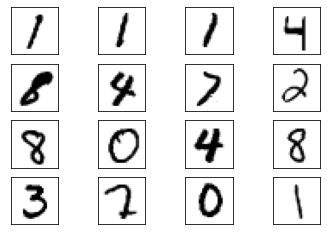

In [53]:
import torch
from torch import nn

import math
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms


torch.manual_seed(111)


device = ""
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")


transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]
)


train_set = torchvision.datasets.MNIST(
    root=".", train=True, download=True, transform=transform
)


batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)


real_samples, mnist_labels = next(iter(train_loader))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(real_samples[i].reshape(28, 28), cmap="gray_r")
    plt.xticks([])
    plt.yticks([])

In [54]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 1024),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = x.view(x.size(0), 784)
        output = self.model(x)
        return output

discriminator = Discriminator().to(device=device)


class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )

    def forward(self, x):
        output = self.model(x)
        output = output.view(x.size(0), 1, 28, 28)
        return output

generator = Generator().to(device=device)

In [55]:
lr = 0.0001
num_epochs = 50
loss_function = nn.BCELoss()

optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

In [56]:
for epoch in range(num_epochs):
    for n, (real_samples, mnist_labels) in enumerate(train_loader):
        # Data for training the discriminator
        real_samples = real_samples.to(device=device)
        real_samples_labels = torch.ones((batch_size, 1)).to(
            device=device
        )
        latent_space_samples = torch.randn((batch_size, 100)).to(
            device=device
        )
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1)).to(
            device=device
        )
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )

        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels
        )
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Data for training the generator
        latent_space_samples = torch.randn((batch_size, 100)).to(
            device=device
        )

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels
        )
        loss_generator.backward()
        optimizer_generator.step()

        # Show loss
        if n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")

Epoch: 0 Loss D.: 0.5692477226257324
Epoch: 0 Loss G.: 0.4779079854488373
Epoch: 1 Loss D.: 0.018048418685793877
Epoch: 1 Loss G.: 4.075692176818848
Epoch: 2 Loss D.: 0.06801412999629974
Epoch: 2 Loss G.: 5.338421821594238
Epoch: 3 Loss D.: 0.1339186728000641
Epoch: 3 Loss G.: 3.9452993869781494


KeyboardInterrupt: 